In [9]:
import cv2,sys,os
import numpy as np
from Algorithm.lbph import getLBPimage,blockshaped,histogram
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from skimage import io

In [10]:
haar_file = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

In [12]:
datasets = './Data/Celeb/Train'

(height,width) = (70,70)
(images,labels,names,id) = ([],[],{},0)

for (subdirs,dirs,files) in os.walk(datasets):
        for subdir in dirs:
            names[id]=subdir
            subjectpath=os.path.join(datasets,subdir)
            for filename in os.listdir(subjectpath):
                path=subjectpath+'/'+filename
                lable=id
                img = cv2.imread(path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray,1.3,4)
                for (x,y,w,h) in faces:
                    face = gray[y:y+h,x:x+w]
#                     print(face.shape)
                    face = cv2.resize(face,(width,height))
#                     print(face.shape)
                    images.append(face)
                    labels.append(int(lable))
            id+=1
        break

In [13]:
len(images)

76

In [14]:
id

5

In [26]:
(images,labels) = [np.array(lis) for lis in [images,labels]]

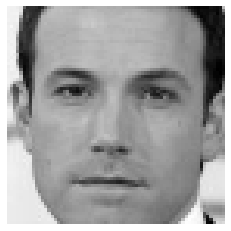

In [27]:
sample = X_train[0]
plt.imshow(sample,cmap='gray')
plt.axis('off')
plt.show()

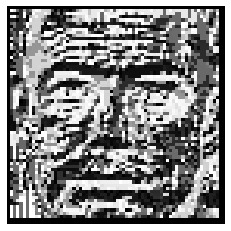

In [28]:
lbp_image = getLBPimage(sample)
plt.imshow(lbp_image,cmap='gray')
plt.axis('off')
plt.show()

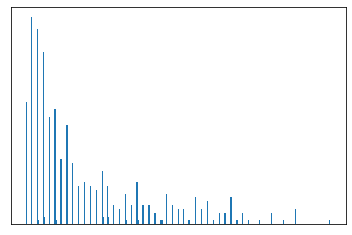

In [29]:
shaped = blockshaped(lbp_image,10,10)
    
xBlocks = []
for s in shaped:
    xBlocks.append(histogram(s))
lbph = np.concatenate(xBlocks)

plt.hist(lbph,bins=2**8)
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:
x = []

for img in images:
    lbp = getLBPimage(img)
    shaped = blockshaped(lbp,10,10)
    
    xBlocks = []
    for s in shaped:
        xBlocks.append(histogram(s))
    lbph = np.concatenate(xBlocks)
    
    x.append(lbph)

In [33]:
X_train,y_train = x,labels

In [35]:
datasets = './Data/Celeb/val'

(height,width) = (70,70)
(images,labels,names,id) = ([],[],{},0)

for (subdirs,dirs,files) in os.walk(datasets):
        for subdir in dirs:
            names[id]=subdir
            subjectpath=os.path.join(datasets,subdir)
            for filename in os.listdir(subjectpath):
                path=subjectpath+'/'+filename
                lable=id
                img = cv2.imread(path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray,1.3,4)
                for (x,y,w,h) in faces:
                    face = gray[y:y+h,x:x+w]
#                     print(face.shape)
                    face = cv2.resize(face,(width,height))
#                     print(face.shape)
                    images.append(face)
                    labels.append(int(lable))
            id+=1
        break
        
x = []

for img in images:
    lbp = getLBPimage(img)
    shaped = blockshaped(lbp,10,10)
    
    xBlocks = []
    for s in shaped:
        xBlocks.append(histogram(s))
    lbph = np.concatenate(xBlocks)
    
    x.append(lbph)
    
X_test,y_test = x,labels

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [37]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [39]:
model = SVC(probability=True)
model.fit(X_train_pca,y_train)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
y_pred = model.predict(X_test_pca)
print('Test Accuracy:',accuracy_score(y_pred,y_test))

Test Accuracy: 0.72


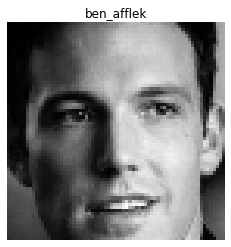

In [54]:
sample_image = X_test[0]

sample = np.expand_dims(X_test_pca[0],axis=0)
pred = model.predict(sample)

plt.imshow(images[0],cmap='gray')
plt.axis('off')
name = names[pred[0]]
plt.title(name)
plt.show()

In [68]:
np.linalg.norm(X_test[0]-X_train[0])

0.07573523174130195

In [77]:
abs(np.sum(X_test[0]-X_train[0]))

0.0011031890686396353

In [78]:
abs(np.sum(X_test[0]-X_train[60]))

0.003555348714563541